<a href="https://colab.research.google.com/github/asyaf/magritte/blob/master/the_great_war.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# general imports
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

%matplotlib inline

In [2]:
# face recognition imports
!pip install face_recognition
import face_recognition

     |████████████████████████████████| 100.2MB 70kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566176 sha256=3f5c178f3b1399d2607d376990af6ad18d00d566ed2e1b829516eb7571a6f2c7
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
IMG_PATH = "drive/My Drive/Data/magritte data"
BACK_IMG = "bride.jpg"
FRONT_IMG = "purple-flowers.png"
BACK_IMG_PATH = os.path.join(IMG_PATH, BACK_IMG)
FRONT_IMG_PATH = os.path.join(IMG_PATH, FRONT_IMG)

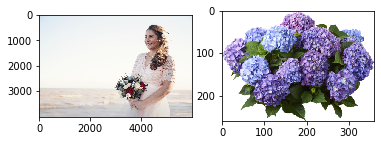

In [5]:
def load_image(path, use_alpha = False):
  if use_alpha:
    # will load aloha channel if exists
    img = cv2.imread(path, cv2.IMREAD_UNCHANGED)
    return cv2.cvtColor(img, cv2.COLOR_BGRA2RGBA)
  else:
    img = cv2.imread(path)
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

back_img = load_image(BACK_IMG_PATH)
front_img = load_image(FRONT_IMG_PATH, True)  

fig, axs = plt.subplots(1, 2)
axs[0].imshow(back_img)
axs[1].imshow(front_img)
plt.show()

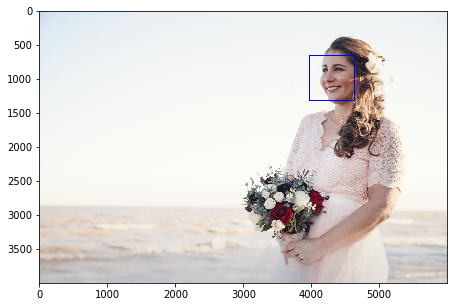

In [6]:
face_locations = face_recognition.face_locations(back_img)

# draw a box around the face
fig2 = plt.figure(figsize = (20,5))
ax2 = fig2.add_subplot(111)
boxed_img = back_img.copy()
if len(face_locations) > 0:
  for (top, right, bottom, left) in face_locations:
    cv2.rectangle(boxed_img, (left, top),(right, bottom), (0, 0, 255), 10)
ax2.imshow(boxed_img)
plt.show()

In [0]:
def alpha_blend(foreground, background, alpha):
  # convert uint8 to float
  foreground = foreground.astype(float)
  background = background.astype(float)
 
  # normalize the alpha mask to keep intensity between 0 and 1
  alpha = alpha.astype(float)/255

  # multiply the foreground with the alpha matte
  foreground = cv2.multiply(alpha, foreground)
 
  # multiply the background with ( 1 - alpha )
  background = cv2.multiply(1.0 - alpha, background)
 
  # add the masked foreground and background.
  out = cv2.add(foreground, background)
  return out

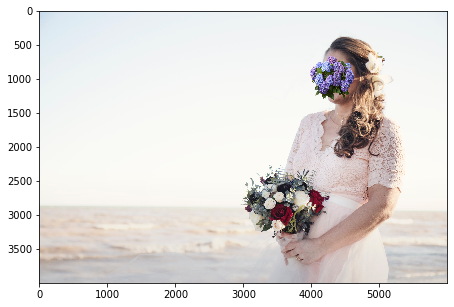

In [58]:
fig3 = plt.figure(figsize = (20,5))
ax3 = fig3.add_subplot(111)
if len(face_locations) > 0:
  res_img = back_img.copy() 
  for (top, right, bottom, left) in face_locations:
    width = right - left
    height = bottom - top
    front_copy = front_img.copy()
    front_copy = cv2.resize(front_copy, (width, height), interpolation = cv2.INTER_AREA)
    # print(front_copy.shape)
    alpha = front_copy[:,:,3]
    alpha_img = cv2.merge([alpha] * 3)
    
    blended = alpha_blend(front_copy[:,:,0:3], res_img[top:bottom, left:right], alpha_img)
    res_img[top:bottom, left:right, :] = blended
p = plt.imshow(res_img)